In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect('../data/database.db')

In [3]:
df = pd.read_sql_query('SELECT * FROM loanDev JOIN (select * from account JOIN district where account.districtId = district.id) as A where loanDev.accountId = A.id;', con)
df.head()

,id,accountId,date,amount,duration,payments,status,id,districtId,frequency,...,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96
0,5314,1787,930705,96396,12,8033,-1,1787,30,weekly issuance,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,5316,1801,930711,165960,36,4610,1,1801,46,monthly issuance,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,6863,9188,930728,127080,60,2118,1,9188,45,monthly issuance,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,5325,1843,930803,105804,36,2939,1,1843,12,monthly issuance,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,7240,11013,930906,274740,60,4579,1,11013,1,weekly issuance,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [4]:
df = df.drop(['id', 'accountId', 'payments', 'districtId', 'frequency'], axis=1)
df.head()

,date,amount,duration,status,date,id:1,districtName,region,nInhabitants,nMunicipalitiesSub499Inhabitants,...,nMunicipalities2000to9999Inhabitants,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96
0,930705,96396,12,-1,930322,30,Sokolov,west Bohemia,94812,15,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,930711,165960,36,1,930213,46,Nachod,east Bohemia,112709,48,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,930728,127080,60,1,930208,45,Jicin,east Bohemia,77917,85,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,930803,105804,36,1,930130,12,Pribram,central Bohemia,107870,84,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,930906,274740,60,1,930214,1,Hl.m. Praha,Prague,1204953,0,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


<AxesSubplot:>

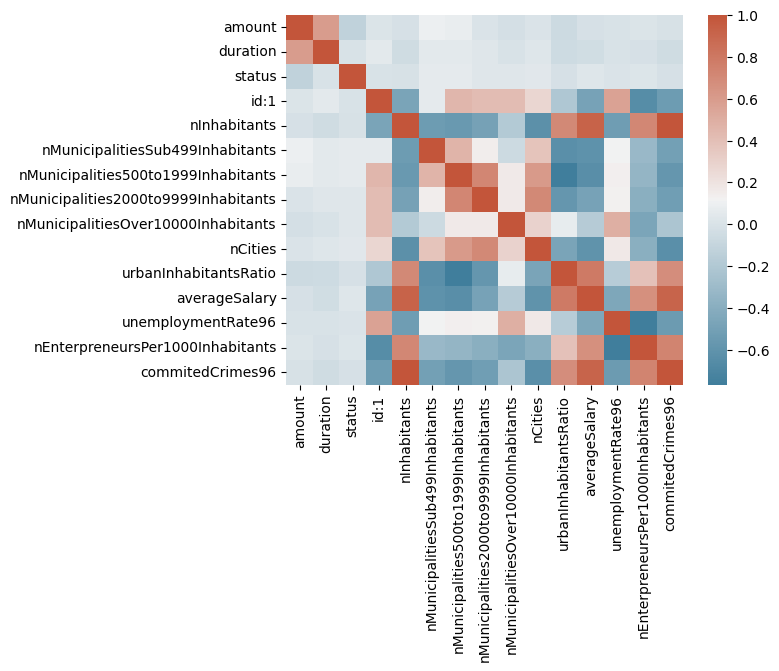

In [5]:
sns.heatmap(df.corr(), cmap=sns.diverging_palette(230, 20, as_cmap=True))

<AxesSubplot:xlabel='districtName', ylabel='count'>

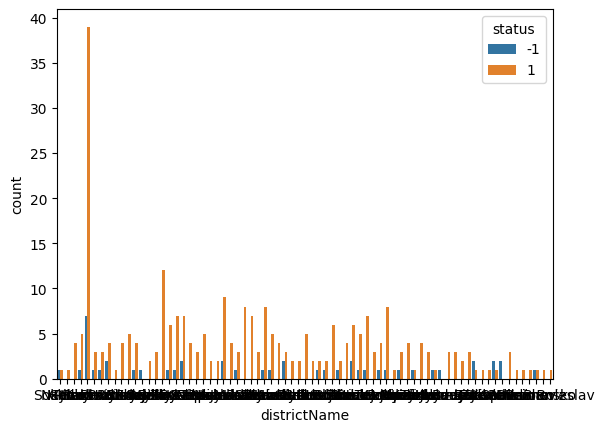

In [6]:
sns.countplot(df, x='districtName', hue='status')